LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!
The "loan_status" column contains our label.







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('E:\\Data Science\\TensorFlow_FILES\\TensorFlow_FILES\\DATA\\lending_club_loan_two.csv')

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

 Exploratory Data Analysis

In [6]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

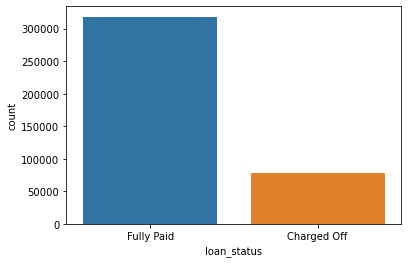

In [7]:
plt.figure(figsize=(6,4))

sns.countplot(data['loan_status'])

(0.0, 45000.0)

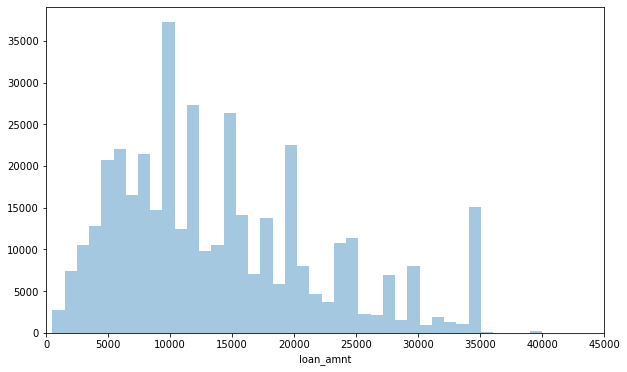

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(data['loan_amnt'], bins = 40, kde =False)
plt.xlim(0,45000)

In [9]:
corr = data.corr()

In [10]:
corr.transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


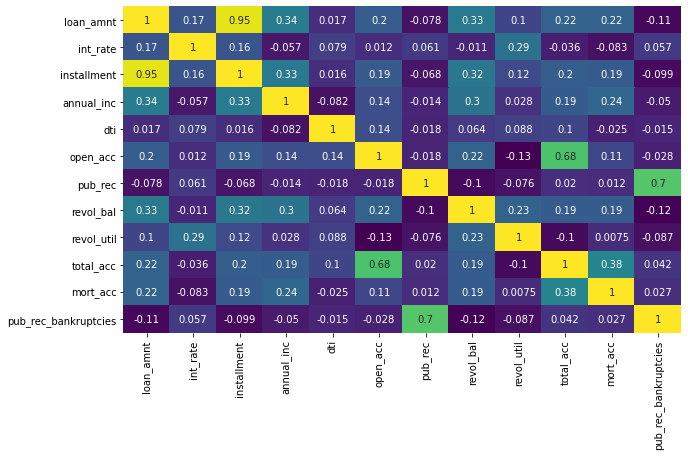

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cbar=False, cmap='viridis' )

There is high correlation between loan_amnt and the installment. The higher the laon_amnt the higher is the installment which makes sense

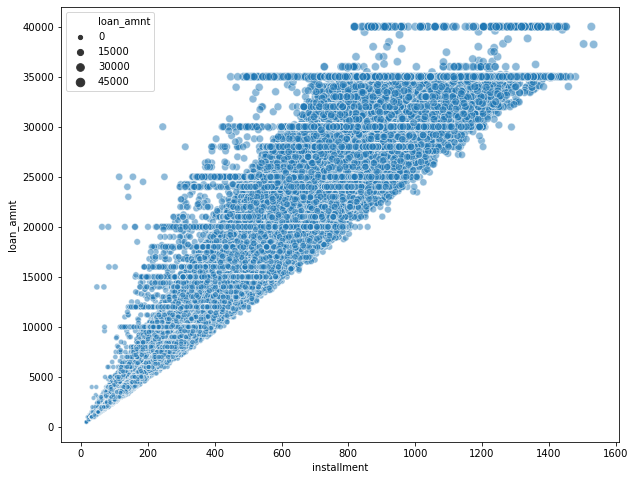

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot( x= 'installment' , y='loan_amnt', data=data, alpha=0.5, size='loan_amnt')

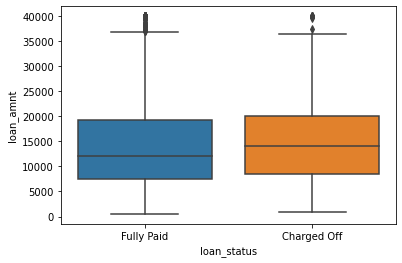

In [13]:
sns.boxplot(x= 'loan_status', y='loan_amnt', data=data)

the boxplot of charged off loans is slightly higher which means the higher the loan amont the higher the likelyhoof of it being charged off

In [14]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The statistic analysis demonstrates that the average of the loan amount for the charged off category is higher than fully paid loans

In [15]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

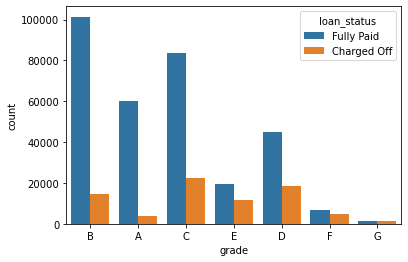

In [17]:
sns.countplot(data=data, x='grade', hue='loan_status')

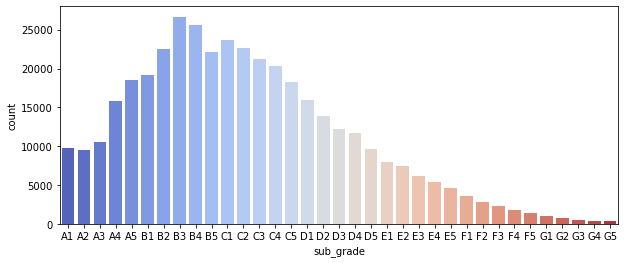

In [18]:
plt.figure(figsize=(10,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot( x='sub_grade', data=data, order=subgrade_order, palette = 'coolwarm')

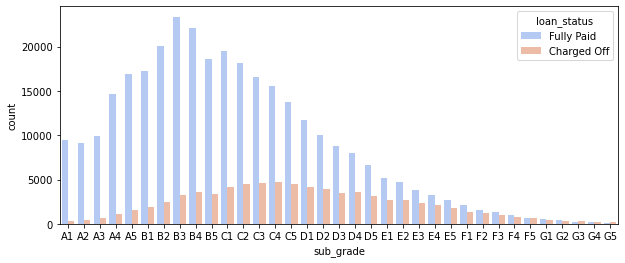

In [19]:
plt.figure(figsize=(10,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot( x='sub_grade', data=data, order=subgrade_order, palette = 'coolwarm', hue='loan_status')

In [20]:
f_and_g = data[(data['grade']=='G') | (data['grade']=='F')]

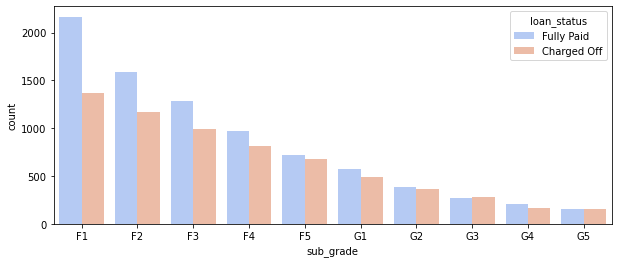

In [21]:
plt.figure(figsize=(10,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot( x='sub_grade', data=f_and_g, order=subgrade_order, palette = 'coolwarm', hue='loan_status')

In [22]:
data['loan-repaid2'] = data['loan_status'].map({'Fully paid':1,'Charged off':0 })

In [23]:
data.drop('loan-repaid2', axis=1, inplace=True)

In [24]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1,'Charged Off':0 })

In [25]:
data[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Data preproccesing

In [26]:
(data.isnull().sum()/ len(data)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [27]:
def info(col):
    print(data.loc[col]['Description'])

In [28]:
data['emp_title'].nunique()

173105

In [29]:
df = data.drop('emp_title', axis=1, inplace=True)

In [30]:
data['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [31]:
emp_lenth_order = ['< 1 year', '1 year','2 years','3 years', '4 years','5 years', '6 years','7 years', '8 years','9 years',
 '10+ years']

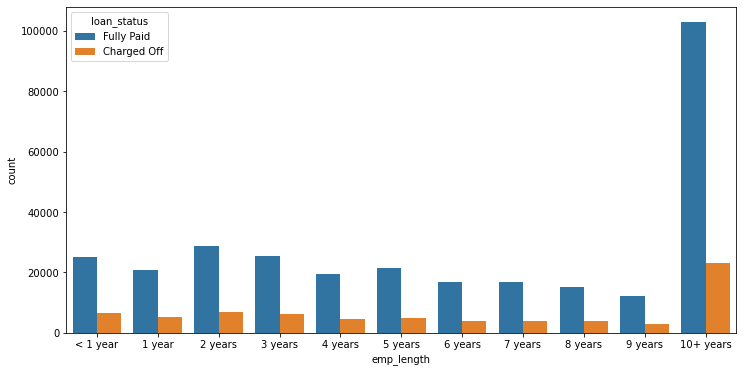

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, order=emp_lenth_order, x='emp_length', hue='loan_status')

In [33]:
emp_ch = data[data['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [34]:
emp_paid = data[data['loan_status']== 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [35]:
emp_len = emp_ch/(emp_paid+emp_ch)

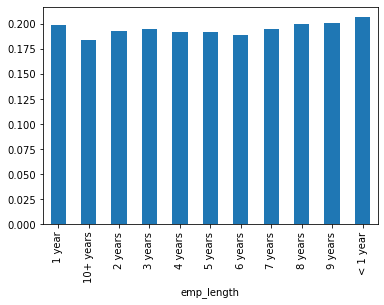

In [36]:
emp_len.plot(kind='bar')

In [37]:
data= data.drop('emp_length', axis=1)

In [38]:
data['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [39]:
data['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

Since they are the same we will drop the 'title' column

In [40]:
data = data.drop('title', axis=1)

In [41]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [44]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [47]:
ave_mort = data.groupby('total_acc').mean()['mort_acc']

In [50]:
ave_mort

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [49]:
def fill_na_mort(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return ave_mort[total_acc]
    else:
        return mort_acc

In [52]:
data['mort_acc'] = data.apply(lambda x : fill_na_mort(x['total_acc'],x['mort_acc']), axis=1)


In [53]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [54]:
data = data.dropna()

In [55]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

dealing with Categorical values

In [59]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [61]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [62]:
data['term'] = data['term'].apply( lambda term : int(term[:3]))

<ipython-input-62-2b2c37444334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['term'] = data['term'].apply( lambda term : int(term[:3]))


In [63]:
data['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

Grade feature

In [64]:
data = data.drop('grade', axis=1)

Sub_grade function

In [68]:
dummies = pd.get_dummies(data['sub_grade'], drop_first = True)

data = pd.concat([data.drop('sub_grade' , axis = 1) , dummies], axis=1)

Converting 'verification_status', 'application_type','initial_list_status','purpose' columns to numerical ones

In [70]:
dummies = pd.get_dummies(data[['verification_status', 'application_type','initial_list_status','purpose']], drop_first = True)

data = pd.concat([data.drop(['verification_status', 'application_type','initial_list_status','purpose'] , axis = 1) , dummies], axis=1)

In [71]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [72]:
data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [73]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [74]:
dummies = pd.get_dummies(data['home_ownership'], drop_first = True)

data = pd.concat([data.drop('home_ownership' , axis = 1) , dummies], axis=1)

Address

In [77]:
data['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [80]:
data['zip_code'] = data['address'].apply(lambda address: address[-5:])

In [81]:
data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [82]:
dummies = pd.get_dummies(data['zip_code'], drop_first = True)

data = pd.concat([data.drop('zip_code' , axis = 1) , dummies], axis=1)

In [83]:
data = data.drop('address', axis=1)

issue_d

In [84]:
data['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [85]:
data = data.drop('issue_d', axis=1)

earliers_cr_line

In [91]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [94]:
data.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

split the data

In [100]:
data = data.drop('loan_status', axis=1)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X = data.drop('loan_repaid', axis=1).values
y = data['loan_repaid'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
X_train = scaler.fit_transform(X_train)

In [108]:
X_test = scaler.transform(X_test)

Creating model

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [112]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [114]:
model.fit(x = X_train,y = y_train, epochs=25, batch_size=256, validation_data = (X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 9s 4ms/step - loss: 0.3605 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2666 - val_loss: 0.2638
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2620 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2614 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2626
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2598 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2602 - val_loss: 0.2624
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2593 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2593 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

evaluating model performance

In [118]:
losses = pd.DataFrame(model.history.history)

In [119]:
losses

,loss,val_loss
0,0.300536,0.265124
1,0.265374,0.263838
2,0.262604,0.262364
3,0.261509,0.262519
4,0.260969,0.262557
5,0.260285,0.261928
6,0.259974,0.262408
7,0.259464,0.261623
8,0.259577,0.261740
9,0.258798,0.261259


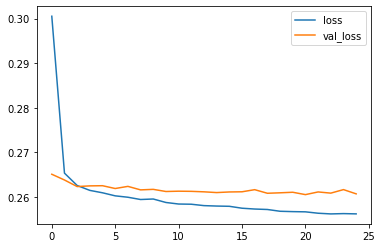

In [120]:
losses.plot()

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
predictions = model.predict_classes(X_test)

C:\Users\Amir\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [124]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 7048  8610]
 [  275 63111]]
